#Question 2 

## Explanation of Design and Implmentation Choices of your Model

>We have coded our model in google colaboratory using keras library which is installed on google colaboratory. This is a high level neural network API which runs on TensorFlow, CNTK, or Theano. 

>PAY ATTENTION to the first line of the code, since google colaboratory has updated to tensorflow 2, we have selected tensorflow 1. if you have tensorflow 1 on your system you don't need to use the first line and should comment it out. 

>We have implemented our CNN model on a 60000 samples dataset. We have tried different structures as included below. However, the best result were achieved using a structure similar to VGG net[1].

>The model have a total of 1,779,429 parameters from which 1,773,925 are trainable. The difference of this model with conventional CNNs is omitting maxpooling layers from after some of the convolutional layers, creating convolutional blocks.




# Model 1: Validation data is used as testing data

## Implementation of our Design Choices (The code is shown in the following)

>We have shuffed and scaled the data in order to break any existing pattern that may be found in the dataset and cause the model overfit or underperform. Furthurmore, we have scaled the data in order to standardize pixel values and bring them all to a same range in order to prevent any overfitting due to varying range of different pixel values.

>Afterwards, we have splitted the data into 80% training data and 20% test data. However, in order to benefit from the effect of validation data we have splited the training data in each epoch into 1% validation data and 99% training data.

>We tried different values for each of the important and effective parameters including batch size, number of epochs, kernel regularizer values, etc. which are explained furthur in the following sections. 

>Based on the achieved resutls this model structure with the following parameters are the best fit. Any change in the model degrades the result, including using different structure or even removing a bloack or layer. 

>Finally, After achieving the best results we have used confusion matrix[2], f1_score[3] and accuracy and loss plot against number of epochs to prove our hypothesis furthur.



## code structure
>After importing the necessary libraries, We have imported the datasets for training and testing. As a preprocessing step, we have shuffled the data in order to break any pattern in the dataset such as all images of one classes put together in training set. We have also normalized the data by dividing each and every pixel by 255 after splitting it to 80% train data and 20% test data. The following block describes the model which is explained in details in the section c. During testing each epoch is divided into 0.9 train data and 0.1 validation data. We have chosen 25 epochs with batch size of 64 in order to compromise the advantage of the convergence speed of small batches and also, higher accuracy gained on bigger batches and then the model is tested on the remaining 20% of the whole dataset. Lastly we have produced the result file in the last block in order to upload the result on kaggle website. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,f1_score,classification_report,cohen_kappa_score
from keras.utils import to_categorical
import time
import random
import seaborn as sns
import matplotlib.pyplot as plt
from keras.regularizers import l2
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Conv2D
from tensorflow.python.keras.layers import MaxPool2D , Activation,BatchNormalization,LeakyReLU
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras.optimizers import SGD ,RMSprop,Adam
tf.test.gpu_device_name()

2021-12-27 16:36:22.232150: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


''

In [ ]:
train_set = pd.read_csv('/content/train.csv')
test_set = pd.read_csv('/content/testX.csv')
train_set.drop(['Id'],axis = 1,inplace=True)
X = train_set.iloc[:, 1:].values
Y = train_set.iloc[:, 0].values
print(X.shape)
print(Y.shape)

(60000, 784)
(60000,)


In [ ]:
def shuffle(X,Y):
  m = X.shape[0]
  permutation = list(np.random.permutation(m))
  shuffled_X = X[permutation,:]
  shuffled_Y = Y[permutation]
  return shuffled_X,shuffled_Y

In [ ]:
# shuffling the data
X,Y = shuffle(X,Y)
print(X)
print(Y)
train_set

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[1 1 2 ... 3 4 0]


,Label,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,44,48,147,59,0,78,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,189,113,111,113,27,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,98,33,70,72,74,46,68,37,40,31,9,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,31,52,98,94,86,94,84,53,89,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,93,178,...,80,73,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43,149,59,0,0,57,137,91,0,0,0,0,0,0,0,0,0,0
59997,4,0,0,0,0,0,0,0,0,0,0,0,0,0,30,69,37,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,241,221,229,173,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,99,117,135,137,135,120,101,27,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,0,0,164,137,130,93,136,138,159,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,249,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,206,85,0,94,202,14,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train_orig, X_test_orig, Y_train_orig, Y_test_orig = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# scaling the data
X_train = X_train_orig/255.
X_test = X_test_orig/255.
X_train_cnn = X_train.reshape(X_train.shape[0],28,28,1)
X_test_cnn = X_test.reshape(X_test.shape[0],28,28,1)

#one-hot encode target column
Y_train_cnn = to_categorical(Y_train_orig)
Y_test_cnn = to_categorical(Y_test_orig)

print("X_train_cnn shape:" + str(X_train_cnn.shape))
print("X_test_cnn shape:"  +  str(X_test_cnn.shape))
print("Y_train_cnn shape:" +  str(Y_train_cnn.shape))
print("X_test_cnn shape:" + str(Y_test_cnn.shape))

X_train_cnn shape:(48000, 28, 28, 1)
X_test_cnn shape:(12000, 28, 28, 1)
Y_train_cnn shape:(48000, 5)
X_test_cnn shape:(12000, 5)


## Model architecture
>Our model, the following code block, consists of 7 blocks. The first four blocks are the "convolutional blocks" with each block consisting of two convolutional layers followed by "ReLU" activation and batch normalization. Every second batch normalization is followed by a maxpooling layer and dropout regularization. Convolutional layers have different number of filter in each block. The first two convolutional layers have 32 filters with size (3,3) and the number of filters doubles as it goes deeper. Every convolutional layer has "same" padding and we regularized kernels with l2 regularizer. This technique(regularizing kernels) increased the accuracy by approximately 1%. Pool size in the max pooling layers are (2,2) and the stride of every layer including convolutional and max pooling layers is set to 1. Dropout technique which proved to be the most effective technique compared to L2, RMSProp and Momentum regularization has been used in our model with rate set to 0.25 for convolutional blocks and 0.5 for the last fully connected layer.

>We have used two fully connected layers with 1024 neurons which the outputs of the last fully connected layer is fed into a 5 way softmax in order to distribute the probabilities over 5 classes that we have. Fully connected layers have no activation function since using ReLU activation for fully connected layers led to lower accuracy.

In [ ]:
# model
def CNN(width,height,depth,classes):

  model=Sequential()
  inputshape=(width,height,depth)
  #model begin

  #First
  model.add(Conv2D(32, (3,3), padding="same", input_shape=inputshape,kernel_regularizer=l2(0.0001)))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=-1))
  model.add(Conv2D(32, (3,3) ,padding="same" ,kernel_regularizer=l2(0.0001)))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=-1))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

#Second
  model.add(Conv2D(64, (3,3)  , padding="same", kernel_regularizer=l2(0.0001)))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=-1))
  model.add(Conv2D(64,(3,3),padding="same", kernel_regularizer=l2(0.0001)))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=-1))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.25))
  
#third
  model.add(Conv2D(128, (3,3)  , padding="same", kernel_regularizer=l2(0.0001)))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=-1))
  model.add(Conv2D(128,(3,3),padding="same", kernel_regularizer=l2(0.0001)))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=-1))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

#forth
  model.add(Conv2D(128, (3,3)  , padding="same", kernel_regularizer=l2(0.0001)))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=-1))
  model.add(Conv2D(128,(3,3),padding="same", kernel_regularizer=l2(0.0001)))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=-1))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(1024))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(1024))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))

  model.add(Dense(classes))
  model.add(Activation('softmax'))
 
  return model

In [ ]:
model=CNN(28,28,1,5)
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________

In [ ]:
# training the model

num_epochs=50
init_lr=1e-2
BS = 64

tic = time.time()

opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=init_lr/num_epochs)
model=CNN(28,28,1,5)
model.compile(loss="categorical_crossentropy",optimizer=opt, metrics=["accuracy"])
result = model.fit(X_train_cnn,Y_train_cnn, validation_split = 0.01, batch_size =BS, epochs=num_epochs)

toc = time.time() - tic
print("Runtime_train: ", toc)
print("Relu with default kernel activation")

Train on 47520 samples, validate on 480 samples
Epoch 1/50
47520/47520 [==============================] - 16s 334us/sample - loss: 0.8426 - acc: 0.7142 - val_loss: 0.4743 - val_acc: 0.8271
Epoch 2/50
47520/47520 [==============================] - 14s 287us/sample - loss: 0.5564 - acc: 0.8070 - val_loss: 0.4605 - val_acc: 0.8375
Epoch 3/50
47520/47520 [==============================] - 14s 289us/sample - loss: 0.5131 - acc: 0.8241 - val_loss: 0.3948 - val_acc: 0.8562
Epoch 4/50
47520/47520 [==============================] - 14s 288us/sample - loss: 0.4876 - acc: 0.8324 - val_loss: 0.3771 - val_acc: 0.8625
Epoch 5/50
47520/47520 [==============================] - 14s 287us/sample - loss: 0.4648 - acc: 0.8433 - val_loss: 0.3744 - val_acc: 0.8729
Epoch 6/50
47520/47520 [==============================] - 14s 289us/sample - loss: 0.4395 - acc: 0.8567 - val_loss: 0.3302 - val_acc: 0.8833
Epoch 7/50
47520/47520 [==============================] - 14s 286us/sample - loss: 0.4303 - acc: 0.8596 - 

In [ ]:
# testing on testset
tic = time.time()
preds = model.evaluate(X_test_cnn,Y_test_cnn)
toc = time.time() - tic
print("Runtime_test: ",toc)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

12000/12000 [==============================] - 2s 163us/sample - loss: 0.3924 - acc: 0.9038
Runtime_test:  1.9676635265350342
Loss = 0.3924348133802414
Test Accuracy = 0.9038333


## Other metrics for evaluation
Confucion matrix
>We have used confusion matrix and f1_score [2],[3]. Based on the confusion matrix the model has assigned 2353, 2135, 2115, 2056 and 2187  data to classes 0 to 4 respectively. We can also see that our model has made mistakes on classes that are close to each other.  The rows represent the predicted classes and columns represent actual labels.

F1_score
>Based on classification report we can observe the f1-score for each class. The f1_score formula is: 
\begin{equation}
F1 = 2 \frac{P.R}{P+R}
\end{equation}
where P represents precision and R, recall. We can see that the f1_score for this model is 91 which represents the accuracy. F1_score for class zero is 96% which means that our model has done a relatively good job on classifying this class. On the other hand, class 3 has f1_score of 87% meaning that the classification was not relatively as good on this class.

Cohen's kappa
>We have also used cohen's kappa which is another metric to evaluate the accuracy of our model. Cohen's kappa measures the agreement between two raters who each classify N items into C mutually exclusive categories [5].
\begin{equation}
K = \frac{P_o - P_e}{1-P_e}
\end{equation}
where $P_o$ is relative observed agreement among raters and $P_e$ is the hypothetical probability of chance agreement, using the observed data to calculate the probabilities of each observer randomly seeing each category. \\
Based on cohen' kappa the accuracy is 87.9%.

In [ ]:
# other metrics for evaluation
Y_pred = model.predict_classes(X_test_cnn)
print('Confusion Matrix:\n')
print(confusion_matrix(Y_test_orig, Y_pred))
print('Classification Report:\n')
print(classification_report(Y_test_orig, Y_pred))
kappa = cohen_kappa_score(Y_test_orig, Y_pred)
print('Cohens kappa: %f' % kappa)

Confusion Matrix:

[[2353   87   14    0    0]
 [  60 2135  143   21    3]
 [  13  149 2115  104   16]
 [   0   24  228 2056   83]
 [   4    8   34  163 2187]]
Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2454
           1       0.89      0.90      0.90      2362
           2       0.83      0.88      0.86      2397
           3       0.88      0.86      0.87      2391
           4       0.96      0.91      0.93      2396

    accuracy                           0.90     12000
   macro avg       0.90      0.90      0.90     12000
weighted avg       0.91      0.90      0.90     12000

Cohens kappa: 0.879790


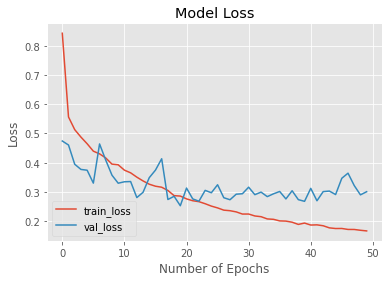

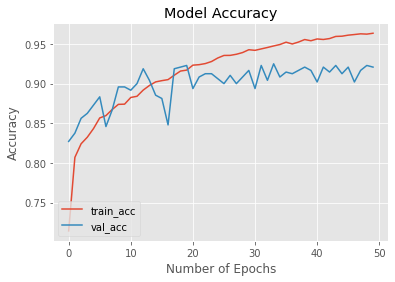

In [ ]:
# Q2.5: plot loss and accuracy of training and validation set against number of epochs
N = num_epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), result.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), result.history["val_loss"], label="val_loss")
plt.title("Model Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend(loc="lower left")

plt.figure()
plt.plot(np.arange(0, N), result.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), result.history["val_acc"], label="val_acc")
plt.title("Model Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")

## Accuracy plots
>Based on the above plots, We can observe that the training accuracy is increasing as the number of epochs is increasing and the loss in decreasing. However, although the validation accuracy and loss is increasing and decreasing respectively which is reasonable, it fluctuates, although it fluctuates around 90%. It is not considered as a problem since it is not a sign of overfitting. However, We believe there might be two reasons that this happens: \\
>>1- The validation set is small since it consists only 480 data. However, when we were trying larger validation sets the validation accuracy was still fluctuating and the overall accuracy was lower. When we changed the size of the validation set(lower) we got higher overall accuracy. \\
>>2- Different learning rates are very effective on the accuracy of the model and the accuracy it achieves. We tried different learning rates and we got somehow similar results thus we picked the one that resulted in the highest accuray.

## Kaggle competition score
>The best result we have achieved is by the model above which is a six blocks of layers CNN. The structure of the model is similar to VGG net Simonyan et al.(2015) constructed of four convolutional blocks and three fully connected layers. However, some changes are applied in order to get higher accuracy on the specific dataset used in this assignment. The architecture is explained furthur in the following section. Additionally, we have tested furthur changes in the same model of ours. We have tested our model using different parameters and added layers to convolutional blocks and fully connected layers in order to see the results. 

>The highest result that we got on kaggle is 91.28%. Different teams have used different structures and from our experiments the number of layers are important in achiveing higher accuracy.



## Different parameters and general discussion

>We have run our model on google colaboratory using GPU thus the runtime of the model during training was 20-30 seconds for every epoch and 1210 - 1230 seconds for 50 epochs. The runtime on testset was 3 to 4 seconds.


>Like any other CNN, we have made use of convolutional layers, batchnormalization layers, maxpooling layers, Dropout technique for regularization, ReLU activation function and adam optimizer. In our convolutional layers we have regularized kernels using l2 technique in order to penalize the differences during updating kernels. The rate for these regularizers has been set to 0.0001. This number was achieved by try and error over different numbers. Since the decay rate is small the weights are updated in smaller steps hence the accuracy is higher. However, We tried smaller amounts but the result worsened since the steps were too small and the optimum weights were not found(since it could get stuck in local minima) or achieved fast enough. All kernels have been initialized by glorot_uniform initialization technique by default. every convolutional layer utilize "same" padding in order to keep the dimension of the input image. \\
We have used "ReLU" activation function which is a non-saturating non-linearity function that applies to the output of every convolutional layer. This activation function is:
\begin{equation}
f(x) = max(0,x)
\end{equation}
We have used batch normalization function in order to normalize the batches in every layer which improves the result by 1% in average. \\
Max pooling layer is used after some of the convolutional layers which is the common structure of VGG net introduced by Simonyan et al. which improved the accuracy for 2% to 3% compared to standard and routine CNN structures. Also, max pooling layer has improved the results more than average pooling layer. \\
Dropout technique is used to regularize the output of some of the layers. Again, this technique has not been used in all the layers, however, we have used it in the end of each block and in between every fully connected layers. The rate chosen for convolutional blocks is 0.25
since we do not want to eliminate too many neurons in the convolutional blocks which results in large reduction in the accuracy. We have chosen 0.5 rate for fully connected layers since these layers are to reconstruct the images and hence we can regularize them more in order to increase the speed without hurting the accuracy substantially. \\
Finaly, we have utilized adam optimizer since it is the most common optimizer used and the results were higher than other optimizers including RMSProp and stochastic gradient descent with momentum. The parameters for adam optimizers were chosen by default according to the original paper Kingma et al. (2014) in which is recommended to set beta1 to 0.9 and beta2 to 0.999 and the decay rate is set to initial learning rate devided by number of epochs in order to decrease the learning rate as it converges not to jump over the optimum value. \\


## Validation set
>In the second model, we have used 20% of the data as test data and 80% for training. For the first model, which we achieved higher accuracy, we used 10% of the 80% training data as validation set and the remaining 20% is used for testing. We observed that the first method is more convenient and achieved higher accuracy. 

In [ ]:
# creating results for submission on kaggle
testing_data = test_set.iloc[:, 1:].values
testing_data = testing_data/255.
test_ID = test_set.iloc[:, 0].values
testing_data = testing_data.reshape(testing_data.shape[0],28,28,1)
print(testing_data.shape)
Label_test_cnn = model.predict_classes(testing_data)
print(Label_test_cnn)
Title = ['Id', 'Label']
print(type(test_ID))
print(type(Label_test_cnn))

final=np.vstack([test_ID,Label_test_cnn])

print(final)
submit=pd.DataFrame(data=final.T,columns=Title)
print(submit)

submit.to_csv('/content/Result.csv',index=False)

(10000, 28, 28, 1)
[4 4 0 ... 3 2 2]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[[   0    1    2 ... 9997 9998 9999]
 [   4    4    0 ...    3    2    2]]
        Id  Label
0        0      4
1        1      4
2        2      0
3        3      1
4        4      1
...    ...    ...
9995  9995      1
9996  9996      1
9997  9997      3
9998  9998      2
9999  9999      2

[10000 rows x 2 columns]


# Model 2: testing data is used and no validation set is used

In [ ]:
# used test data as validation
num_epochs=50
init_lr=1e-2
BS = 64

tic = time.time()

opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=init_lr/num_epochs)
model=CNN(28,28,1,5)
model.compile(loss="categorical_crossentropy",optimizer=opt, metrics=["accuracy"])
result = model.fit(X_train_cnn,Y_train_cnn, batch_size =BS, epochs=num_epochs)

toc = time.time() - tic
print("Runtime_train: ", toc)
print("Relu with default kernel activation")

Train on 48000 samples
Epoch 1/50
48000/48000 [==============================] - 21s 428us/sample - loss: 0.8416 - acc: 0.7138
Epoch 2/50
48000/48000 [==============================] - 13s 279us/sample - loss: 0.5694 - acc: 0.7988
Epoch 3/50
48000/48000 [==============================] - 13s 278us/sample - loss: 0.5105 - acc: 0.8247
Epoch 4/50
48000/48000 [==============================] - 13s 278us/sample - loss: 0.4853 - acc: 0.8337
Epoch 5/50
48000/48000 [==============================] - 13s 277us/sample - loss: 0.4632 - acc: 0.8439
Epoch 6/50
48000/48000 [==============================] - 13s 277us/sample - loss: 0.4464 - acc: 0.8523
Epoch 7/50
48000/48000 [==============================] - 13s 277us/sample - loss: 0.4274 - acc: 0.8605
Epoch 8/50
48000/48000 [==============================] - 13s 278us/sample - loss: 0.4091 - acc: 0.8672
Epoch 9/50
48000/48000 [==============================] - 13s 278us/sample - loss: 0.4009 - acc: 0.8706
Epoch 10/50
48000/48000 [================

In [ ]:
# testing on testset
tic = time.time()
preds = model.evaluate(X_test_cnn,Y_test_cnn)
toc = time.time() - tic
print("Runtime_test: ",toc)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

12000/12000 [==============================] - 2s 162us/sample - loss: 0.3517 - acc: 0.9109
Runtime_test:  2.029775857925415
Loss = 0.3517045966188113
Test Accuracy = 0.9109167


In [ ]:
# other metrics for evaluation
Y_pred = model.predict_classes(X_test_cnn)
print('Confusion Matrix:\n')
print(confusion_matrix(Y_test_orig, Y_pred))
print('Classification Report:\n')
print(classification_report(Y_test_orig, Y_pred))
kappa = cohen_kappa_score(Y_test_orig, Y_pred)
print('Cohens kappa: %f' % kappa)

Confusion Matrix:

[[2298   66   10    0    0]
 [  91 2208  148   20    3]
 [  13  129 2145  124   21]
 [   1   21  134 2080  149]
 [   4    0   23  112 2200]]
Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2374
           1       0.91      0.89      0.90      2470
           2       0.87      0.88      0.88      2432
           3       0.89      0.87      0.88      2385
           4       0.93      0.94      0.93      2339

    accuracy                           0.91     12000
   macro avg       0.91      0.91      0.91     12000
weighted avg       0.91      0.91      0.91     12000

Cohens kappa: 0.888640


## Discussion on the second model(no validation set)
>The model above has no validation data which is another way to approach the problem. We have used all the training data as training data and test data as test data which leaves no data for validating the model on. This model gave accuracy of 89.33% on test data. We can see that not using some of the data as validation set will trouble the model performing on the unseen samples.

>Runtime for this model is 650 -700 for training which is lower than the previous model since we have no data for validating and the data for training is all of the dataset. 

>As shown the accuracy achieved by this model is very close, however lower, to the previous and best model. Based on this result we can deduct that splitting the training data into validation set and training data and leave some unseen data to test the model on, improves the accuracy achieved by the model. We can see that if we don't assign any data to validate the model before testing, the model will underperform.

> We can see that other metrics also support the hypothesis and the accuracy shown by each of the metrics are lower than the main model.




# Model 3 Conventional CNN

In [ ]:
# conventional CNN
def CNN(width,height,depth,classes):

  model=Sequential()
  inputshape=(width,height,depth)
  #model begin

#First
  model.add(Conv2D(32, (3,3), padding="same", input_shape=inputshape,kernel_regularizer=l2(0.0001)))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=-1))
  model.add(MaxPool2D(pool_size=(2,2),padding="same"))
#second
  model.add(Conv2D(32, (3,3) ,padding="same" ,kernel_regularizer=l2(0.0001)))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=-1))
  model.add(MaxPool2D(pool_size=(2,2),padding="same"))
  model.add(Dropout(0.25))
#third
  model.add(Conv2D(64, (3,3)  , padding="same", kernel_regularizer=l2(0.0001)))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=-1))
  model.add(MaxPool2D(pool_size=(2,2),padding="same"))
#forth
  model.add(Conv2D(64,(3,3),padding="same", kernel_regularizer=l2(0.0001)))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=-1))
  model.add(MaxPool2D(pool_size=(2,2),padding="same"))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(1024))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(1024))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))

  model.add(Dense(classes))
  model.add(Activation('softmax'))
 
  return model

In [ ]:
model=CNN(28,28,1,5)
model.summary()


num_epochs=50
init_lr=1e-2
BS = 64

tic = time.time()

opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=init_lr/num_epochs)
model=CNN(28,28,1,5)
model.compile(loss="categorical_crossentropy",optimizer=opt, metrics=["accuracy"])
result = model.fit(X_train_cnn,Y_train_cnn, validation_split = 0.01, batch_size =BS, epochs=num_epochs)

toc = time.time() - tic
print("Runtime_train: ", toc)
print("Relu with default kernel activation")

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
activation_52 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_60 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
activation_53 (Activation)   (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_61 (Batc (None, 14, 14, 32)       

In [ ]:
tic = time.time()
preds = model.evaluate(X_test_cnn,Y_test_cnn)
toc = time.time() - tic
print("Runtime_test: ",toc)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

12000/12000 [==============================] - 1s 104us/sample - loss: 0.3264 - acc: 0.8923
Runtime_test:  1.2548160552978516
Loss = 0.3264453534583251
Test Accuracy = 0.89225


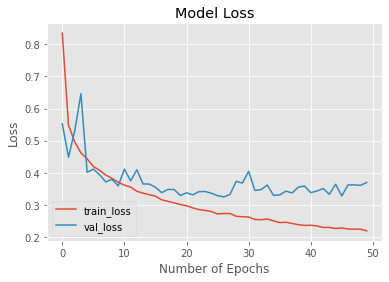

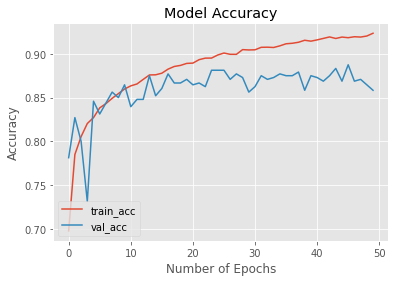

In [ ]:
# Q2.5: plot loss and accuracy of training and validation set against number of epochs
N = num_epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), result.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), result.history["val_loss"], label="val_loss")
plt.title("Model Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend(loc="lower left")

plt.figure()
plt.plot(np.arange(0, N), result.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), result.history["val_acc"], label="val_acc")
plt.title("Model Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")

In [ ]:
# other metrics for evaluation
Y_pred = model.predict_classes(X_test_cnn)
print('Confusion Matrix:\n')
print(confusion_matrix(Y_test_orig, Y_pred))
print('Classification Report:\n')
print(classification_report(Y_test_orig, Y_pred))
kappa = cohen_kappa_score(Y_test_orig, Y_pred)
print('Cohens kappa: %f' % kappa)

Confusion Matrix:

[[2237  100    7    0    0]
 [  68 2147  119   24    4]
 [  14  179 1975  250   20]
 [   2   33   88 2009  292]
 [   2    6   18   67 2339]]
Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      2344
           1       0.87      0.91      0.89      2362
           2       0.89      0.81      0.85      2438
           3       0.85      0.83      0.84      2424
           4       0.88      0.96      0.92      2432

    accuracy                           0.89     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.89      0.89      0.89     12000

Cohens kappa: 0.865311


## Conventional CNN

>In model 3, it is a conventional CNN [7] with 7 layers each consisting of a convolutional layer, activation function "ReLU" [4], normalizing the batches and maxpooling. Dropout regularization is used in order to prevent the model form overfitting. The output of the forth layer is flattened and fed into two dully connected layers with dropout regularization. In the end a 5-way softmax is used to classify each input image.

>Based on the confusion matrix we can observe that main model has performed better in classifying classes 0,2,3. Onthe other hand, conventional CNN has outperformed our model in classifying classes 1 and 4. Results from f1_score table shows that the cnn model has under performed in all classes. As for cohen's kappa, we can observe that cnn model has lower coefficient than the main model. Overall, all the metrics including testset accuracy suggests that the main model outperforms conventional cnn in every aspect.

>Runtime of the above model is lower than the original model since the parameters are lower. Runtime of every epoch is approximately 12 seconds, runtime of the whole process is 592 seconds. 

# Results
The best result we have found was based on the first model with four convolutional blocks and two fully connected blocks. We have achieved 91.280% with this model. The reason is that neural network as oppose to conventional methods such as PCA, do not reduce the dimension of the data and do not need the features to classify the images. It just needs the labels and nonlinearities that cause difficulties for conventional methods in order to classify the data is handled through layers and nonlinearity functions whihc makes the process more automatic. 


# Refrences

[1] Simonyan, K., Zisserman, A.: Very deep convolutional networks for large-scale image recognition. In: NIPS (2015)

[2] Confusion matrix: https://en.wikipedia.org/wiki/Confusion_matrix

[3] F1-score: https://medium.com/analytics-vidhya accuracy-vs-f1-score-6258237beca2

[4] Nair, Vinod and Hinton, Geoffrey E. Rectified linear units improve restricted boltzmann machines. In ICML, pp. 807–814. Omnipress, 2010.

[5] Cohen's Kappa: https://en.wikipedia.org/wiki/Cohen%27s_kappa

[6] Kingma, Diederik P and Ba, Jimmy Lei. Adam: A method for stochastic optimization. arXiv preprint arXiv:1412.6980, 2014.

[7] LeCun, Y., Bottou, L., Bengio, Y., and Haffner, P. Gradient-based learning applied to document recognition. Proceedings of the IEEE, 86(11):2278–2324, November 1998a.



# Question 2 END